<a href="https://colab.research.google.com/github/Wandering-Sci/Python-Samples/blob/main/PyTorch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple PyTorch example on Iris dataset**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Define a class for PyTorch
class Model(nn.Module):
  # 4 features for input layer
  # 2 hidden layers
  # 3 classes for output layer
  def __init__(self, init_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(init_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [4]:
torch.manual_seed(41)
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
iris['species'] = iris['species'].replace(['setosa', 'versicolor', 'virginica'], [0.0,1.0,2.0])
iris.describe()

<ipython-input-8-1e8c6ee4ef01>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['species'] = iris['species'].replace(['setosa', 'versicolor', 'virginica'], [0.0,1.0,2.0])


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
iris_x = iris.drop('species', axis=1)
iris_y = iris['species']

In [10]:
# Convert to numpy array
X = iris_x.values
Y = iris_y.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# train test split
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(X, Y, test_size=0.2, random_state=41)

In [13]:
iris_x_train = torch.FloatTensor(iris_x_train)
iris_x_test = torch.FloatTensor(iris_x_test)

iris_y_train = torch.LongTensor(iris_y_train)
iris_y_test = torch.LongTensor(iris_y_test)

In [14]:
# Set Criterion of model to measure the error - Choose Adam Optimizer & lr - Epochs
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 100
losses = []

In [15]:
for i in range(epochs):
  # Predict based on iris features
  iris_y_pred = model.forward(iris_x_train)

  # Measure the loss
  iris_loss = criterion(iris_y_pred, iris_y_train)

  # Keep track of our losses
  losses.append(iris_loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {iris_loss}')

  # Back propagation
  optimizer.zero_grad()
  iris_loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.2676880657672882
Epoch: 60 and loss: 0.17942363023757935
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118418931961
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

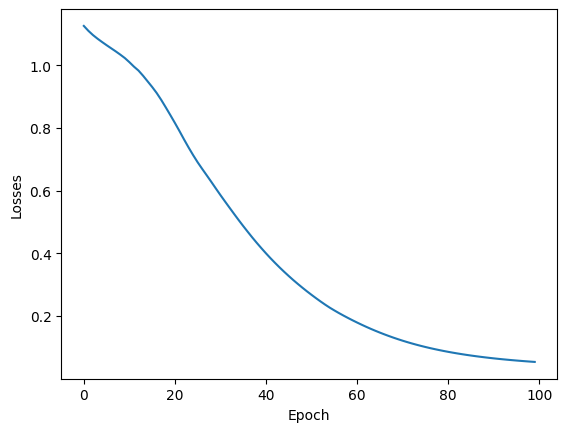

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel("Losses")
plt.xlabel("Epoch")

In [17]:
# Evaluate test set
with torch.no_grad(): # Turn off back propagation
  iris_y_pred = model.forward(iris_x_test)
  iris_loss = criterion(iris_y_pred, iris_y_test)
iris_loss

tensor(0.1315)